# **Colab ব্যবহারকারীদের জন্য নোট**

# **এই ফাইলে সরাসরি লিখবেন না—আপনার কাজ হারিয়ে যেতে পারে!**

# **শুরু করার আগে অবশ্যই একটি কপি তৈরি করুন।**

**কপি কীভাবে তৈরি করবেন**

1. উপরের বাম কোণে "File" ক্লিক করুন।  
> *যদি “File” বা "Runtime" এর মতো হেডার না দেখেন, উপরের ডানদিকে “v” চিহ্ন ক্লিক করে দেখান।*

2. "Save a copy in Drive" ক্লিক করুন।

3. কপিকৃত ফাইলের নাম পরিবর্তন করে দিন “YOURNAMEs_FileName.ipynb”।  
> উদাহরণ: আপনার নাম Olivia হলে → Olivias_FileName.ipynb

4. আপনার runtime সেট করুন **CPU** তে। T4 GPU CPU থেকে অনেক বেশি আপনার session রিসেট করে।<br>  
অতএব, যদি GPU প্রয়োজন না হয় training এর জন্য, CPU runtime ব্যবহার করাই ভালো।<br>  
এই [ভিডিওটা](https://youtu.be/XRmI-qRiFFw) দেখুন।<br>

> যদি মাঝে runtime পরিবর্তন করেন, তাহলে শুরু থেকে সব সেলগুলো আবার চালাতে হবে।<br>  
> শুরু করার আগে runtime ঠিক করে নিন।<br>  
> *সেলগুলো আবার চালানোর জন্য “Runtime” (উপর বামে) → “Run before” ক্লিক করুন।*<br>

---

* চেক মার্ক (✅) থাকবে কিন্তু তা সেভ হবে না। Chrome এর রিফ্রেশ বাটন চাপলে চেক মার্কগুলো মুছে যাবে।<br>  
পজ করে পরে ফিরে আসতে চাইলে, একটা টেক্সট সেল যোগ করে “SO FAR DONE” লিখে রাখুন।

---

* Colab এ **আগের আউটপুটগুলো ৩০ থেকে ৯০ মিনিট পর রিসেট হয়ে যায়**।<br>  
  এ কারণেই `~~ is not defined` ধরনের এরর খুবই ঘন ঘন দেখা দেয়।

  🔁 `~~ is not defined` এরর এলে করণীয়  
  1. প্রথমে নিশ্চিত হোন ভেরিয়েবল এর বানান ঠিক আছে কিনা।<br>  
  2. বানান ঠিক থাকলেও সমস্যা আছে?<br> **যে সেল আবার চালাতে চান সেটি ক্লিক করুন।**<br>  
  3. “Runtime” (উপর বামে) → “Run before” ক্লিক করুন।<br>  
    → এতে **আগের সব সেল আবার চলবে**।  
  4. সেলটি আবার চালান।

  এইগুলি করার পরও সমস্যা থাকলে,<br>  
  আগের সেলের TODO উত্তরে কোনো মৌলিক ভুল থাকতে পারে।<br>  
  আপনার উত্তর ঠিক হয়েছে কিনা ভাল করে পরীক্ষা করুন।<br>  
  অথবা ChatGPT বা অন্য কোনো কোড সহায়ক থেকে সাহায্য নিন।

# Chapter 4: EmbeddingModule

### Section 0: Preparation

এই অংশে শুধু আগের Chapter থেকে কেবলমাত্র কণ্টেন্ট লোড করা হবে।<br>
আপনাকে কোড চালাতে হবে—পড়ার দরকার নেই।<br>
চাইলে এগিয়ে যেতে পারেন।<br>

In [ ]:
# ফাইল ডাউনলোড করুন
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# আপনি এখনই ডাউনলোড করা input.text নামের ফাইলটি utf-8 এ লোড করুন।
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# টেনসর সুন্দরভাবে দেখানোর ফাংশন (পাসও করতে পারেন)
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # শব্দভাণ্ডারের জন্য x সংখ্যক এমবেডিং মাত্রা সহ এমবেডেড টেবিল সংজ্ঞায়িত করুন
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # ইনপুট ইনডেক্সের সাথে সংশ্লিষ্ট এমবেডেড ভেক্টর পান
        return self.token_embedding_table.forward(input_indices)

# অবস্থান এমবেডেড মডিউল সংজ্ঞায়িত করা
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # অবস্থান এমবেডিং লেয়ার
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # সিকোয়েন্সের দৈর্ঘ্য নিন
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # অবস্থান সূচক তৈরি
        position_embeddings = self.position_embedding_layer(position_indices)  # অবস্থান এম্বেডিং
        return position_embeddings

### Section 1: __init__

Token Embedding ও Position Embedding এর instance বানান

In [ ]:
torch.manual_seed(1337)
token_embedding_layer = TokenEmbedding(vocab_size = 65, embedding_dim = 8)
position_embedding_layer = PositionEmbedding(input_sequence_length = 8, embedding_dim = 8)

**Section 1: init** <label><input type="checkbox"> Mark as Done</label>

### Section 2: forward

In [ ]:
# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

token_embeddings = token_embedding_layer.embed(sample_input_tokens)
position_embeddings = position_embedding_layer.forward(sample_input_tokens)

print_formatted_tensor("টোকেন এমবেডিংস", token_embeddings)
print_formatted_tensor("অবস্থান এমবেডিংস", position_embeddings)

**টোকেন এমবেডিং + পজিশন এমবেডিং**

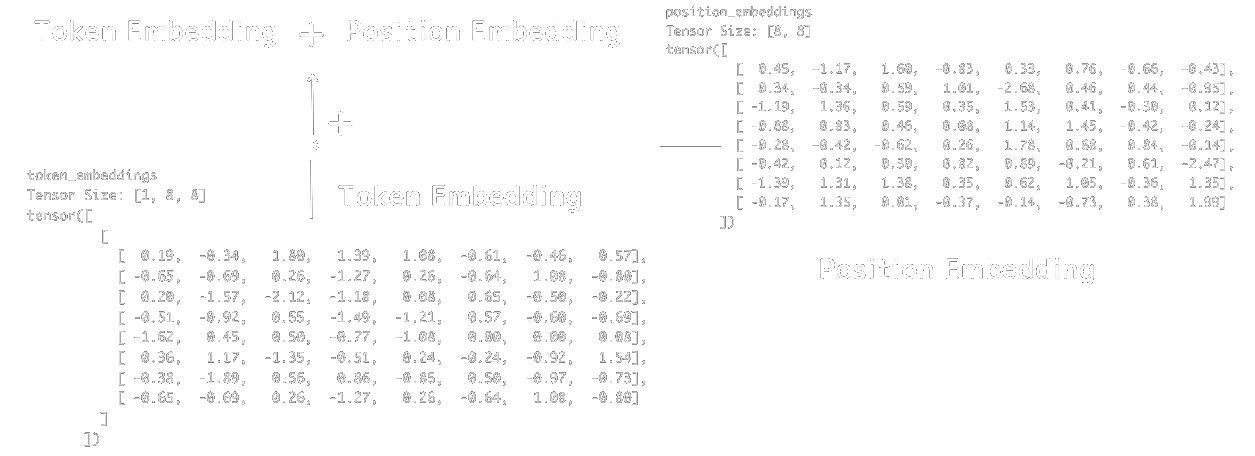

Position embeddings-এ batch dimension থাকে না।<br>
ধরুন আপনি [8, 8] আকারের `position embeddings`<br>
`token embeddings` টেনসরে যোগ করছেন যার আকার [batch_size, 8, 8]।<br>
কোনো ভুল হবে না।<br>
PyTorch `batch_size` বার position embeddings কপি করে প্রতিটি batch-এ যোগ করবে।<br>

এই স্বয়ংক্রিয় বর্ধনকে "broadcasting" বলা হয়।

PyTorch-এ অনেক অপারেশন batch dimension থাক বা না থাক কাজ করে।<br>

In [ ]:
embeddings = # TODO: টোকেন এমবেডিং ভেক্টর এবং অবস্থান এমবেডিং ভেক্টর
print_formatted_tensor("এম্বেডিংস", embeddings)

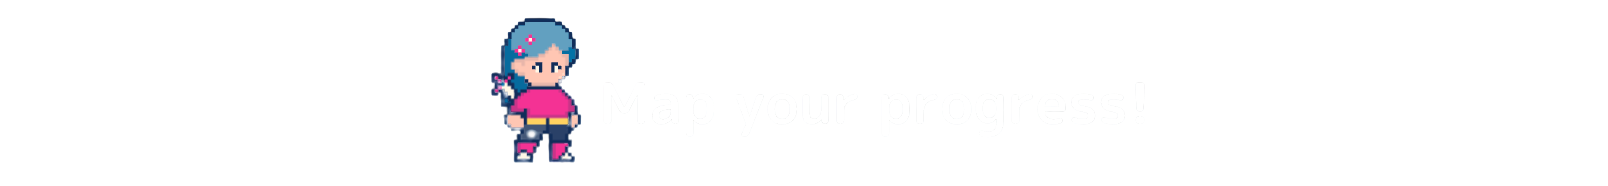

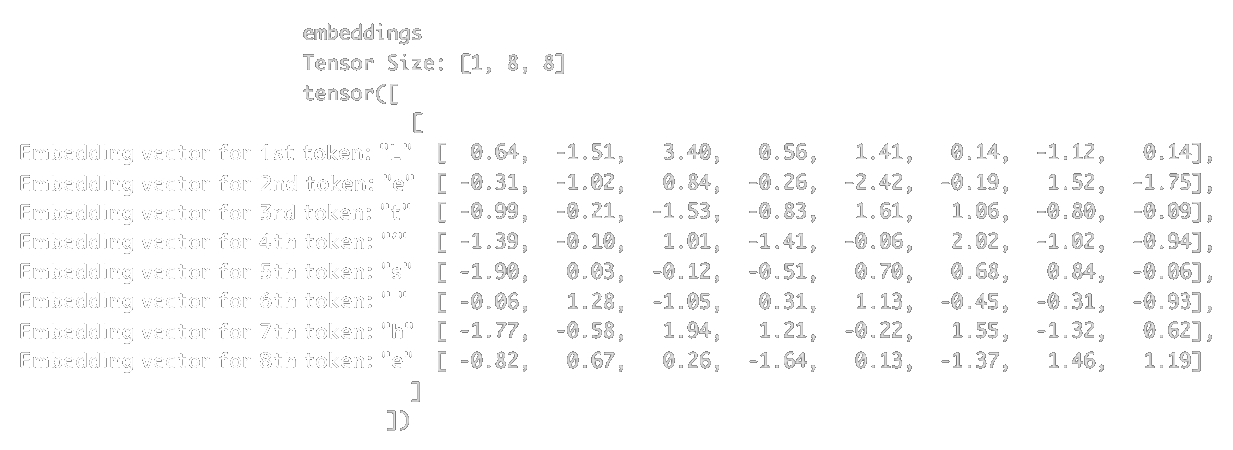

**Section 2: forward** <label><input type="checkbox"> Mark as done</label>

### Section 3: একটি ক্লাস সংজ্ঞায়িত করা

🔘 **Options**: আপনার প্রয়োজন না পড়লেও অতিরিক্ত অপশন থাকতে পারে।

`TokenEmbedding`　　`PositionEmbedding`　　`position_embeddings`　　`token_embeddings`

In [ ]:
class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এম্বেডেড লেয়ার
        self.token_embedding_layer = __________(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # ওয়ার্ড এমবেডিং স্তর
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # অবস্থান তথ্য এমবেড করুন

    def forward(self, input_indices):
        # টোকেন এম্বেডিং নিন
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এমবেডিং পান
        position_embeddings = self.position_embedding_layer.forward(input_indices)  # এম্বেডেড আউটপুট নেওয়া হচ্ছে

        # টোকেন এমবেডিং এবং অবস্থান এমবেডিং যোগ করা হচ্ছে
        embeddings = __________ + __________
        return embeddings

<details>
<summary>উত্তর দেখাতে/লুকাতে এখানে ক্লিক করুন</summary>

```python
class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এমবেডেড লেয়ার
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # শব্দ এমবেডিং লেয়ার
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # অবস্থানের তথ্য এমবেড করা

    def forward(self, input_indices):
        # টোকেন এমবেডিং নেয়া
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এমবেডিং নেয়া
        position_embeddings = self.position_embedding_layer.forward(input_indices)  

        # টোকেন এমবেডিং ও অবস্থান এমবেডিং যোগ করা
        embeddings = position_embeddings + token_embeddings # কোনো নির্দিষ্ট ক্রম নয়
        return embeddings
```

In [ ]:
# মডেল সেটিংস সংরক্ষণের জন্য কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াকরণের জন্য ডেটার সংখ্যা (ব্যাচ সাইজ)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (সিকোয়েন্স দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(1337)

# একটি ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোনো কনফিগারেশন প্যারামিটার নেই (কনস্ট্রাক্টর)।
config = ModelConfig()

# EmbeddingModule একটি ইনস্ট্যান্স তৈরি করা হচ্ছে। কনফিগারেশন প্যারামিটার হলো শব্দভাণ্ডারের সংখ্যা এবং কনফিগ ইনস্ট্যান্স।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
embeddings = # TODO: উদাহরণ.পদ্ধতি(আর্গুমেন্ট)
print_formatted_tensor("এম্বেডিংস", embeddings)

**Section 3: একটি Class ডিফাইন করুন** <label><input type="checkbox"> Mark as Done</label>

**`Check Point`**  <label><input type="checkbox">Chapter 4: EmbeddingModule</label>